In [ ]:
import numpy as np
import pandas as pd

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


.

.

. **SEQUENCE TO SEQUENCE PREPARATION**

.

.



In [ ]:
data = pd.read_pickle('/content/drive/MyDrive/neuronske/data/dataset_full_mfcc.pkl')

data.head()


,filename,mfccs,labels
0,2282.wav,"[[-659.70654, -618.7009, -581.4676, -577.1263,...","[0, 0, 0, 0, 1, 0, 0, 0, 1, 0]"
1,2719.wav,"[[-584.7399, -515.89514, -473.47324, -464.3819...","[0, 0, 0, 0, 0, 1, 0, 0, 1, 0]"
2,1238.wav,"[[-401.96198, -400.9539, -411.34525, -405.876,...","[0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ..."
3,1204.wav,"[[-624.4009, -587.06744, -569.16077, -566.4556...","[0, 1, 0, 1, 0, 0, 0, 0, 1, 0]"
4,3407.wav,"[[-529.351, -534.64343, -551.51184, -555.8778,...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, ..."


In [ ]:
single_row = data.loc[0]
print(single_row)


filename                                             2282.wav
mfccs       [[-659.70654, -618.7009, -581.4676, -577.1263,...
labels                         [0, 0, 0, 0, 1, 0, 0, 0, 1, 0]
Name: 0, dtype: object


In [ ]:
events = pd.read_csv("/content/drive/MyDrive/neuronske/data/Synthetic_dataset/synthetic_dataset.csv", delimiter="\t") 
events.head()

,filename,onset,offset,event_label
0,10.wav,0.287159,1.057712,Alarm_bell_ringing
1,10.wav,1.717124,1.967124,Alarm_bell_ringing
2,10.wav,5.049573,6.013632,Alarm_bell_ringing
3,10.wav,7.240901,8.492352,Speech
4,1000.wav,4.352958,4.664092,Alarm_bell_ringing


In [ ]:
single_row_events = events[((events['filename'] == single_row.filename) & (events['event_label'] == 'Speech'))]
display(single_row_events.head())


,filename,onset,offset,event_label
2654,2282.wav,0.381144,1.21289,Speech
2655,2282.wav,3.221222,4.37680,Speech


In [ ]:
speech_sequence = np.zeros(431)
import math

const = 10 / 431

for index, event in single_row_events.iterrows():
  starting = math.ceil(event.onset / const)
  ending = math.floor(event.offset / const)
  speech_sequence[starting:ending] = 1


print(speech_sequence)

[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.

In [ ]:
import math

const = 10 / 431

def create_sequence(r):
  starting = math.ceil(r.onset / const)
  ending = math.floor(r.offset / const)
  temp = np.zeros(431)
  r['sequence'][starting:ending] = [1 for i in range(ending - starting)]
  return r

def combine_squence_per_filename_and_event(r):
  return list(map(int, list(map(any, zip(*r)))))
  
new_events = events.copy()
new_events['sequence'] = np.zeros((6032, 431)).tolist()

new_events.apply(create_sequence, axis=1)
new_events.head()

result = new_events.groupby(['filename', 'event_label'])['sequence'].agg([combine_squence_per_filename_and_event])
result.head()
print(result.reset_index().loc[0].combine_squence_per_filename_and_event)

[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 

In [ ]:
result = result.reset_index()
result.head()

,filename,event_label,combine_squence_per_filename_and_event
0,10.wav,Alarm_bell_ringing,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, ..."
1,10.wav,Speech,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ..."
2,1000.wav,Alarm_bell_ringing,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ..."
3,1000.wav,Speech,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ..."
4,1003.wav,Alarm_bell_ringing,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ..."


In [ ]:
data = data.drop(columns=['labels'])
final = data.join(result.set_index('filename'), on='filename' , how='left')
final.head()

,filename,mfccs,event_label,combine_squence_per_filename_and_event
0,2282.wav,"[[-659.70654, -618.7009, -581.4676, -577.1263,...",Dog,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ..."
0,2282.wav,"[[-659.70654, -618.7009, -581.4676, -577.1263,...",Speech,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ..."
1,2719.wav,"[[-584.7399, -515.89514, -473.47324, -464.3819...",Electric_shaver_toothbrush,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ..."
1,2719.wav,"[[-584.7399, -515.89514, -473.47324, -464.3819...",Speech,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ..."
2,1238.wav,"[[-401.96198, -400.9539, -411.34525, -405.876,...",Blender,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ..."


In [ ]:
final[final['filename'] == '10.wav']

,filename,mfccs,event_label,combine_squence_per_filename_and_event
1234,10.wav,"[[-378.12094, -376.22183, -385.78647, -386.024...",Alarm_bell_ringing,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, ..."
1234,10.wav,"[[-378.12094, -376.22183, -385.78647, -386.024...",Speech,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ..."


In [ ]:
final.to_pickle('/content/drive/MyDrive/neuronske/data/full_sequences_n40.pkl')

.

.

. **GRU**

.

.



In [ ]:
training = final[final['event_label'] == 'Alarm_bell_ringing']

X = np.array(training.mfccs.tolist())
y = np.array(training.combine_squence_per_filename_and_event.tolist())

# split the dataset 
from sklearn.model_selection import train_test_split 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state = 42)


In [ ]:
X_train.shape

(313, 431, 13)

In [ ]:
print(X_train.shape)
B = np.einsum('ijk->ikj', X_train)
print(B.shape)
X_train = B
print(X_test.shape)
B = np.einsum('ijk->ikj', X_test)
print(B.shape)
X_test = B

(313, 13, 431)
(313, 431, 13)
(79, 13, 431)
(79, 431, 13)


In [ ]:
input_seq_len = 431
num_of_features = 13
# output_len = len(data)

batch_size = 64  # Batch size for training.
epochs = 5  # Number of epochs to train for.
latent_dim = 13  # Latent dimensionality of the encoding space.


In [ ]:
# Define architecture of autoencoder model. 
import tensorflow as tf
from tensorflow import keras

# Define an input sequence and process it.
encoder_inputs = keras.Input(shape=(input_seq_len, num_of_features))
encoder = keras.layers.GRU(latent_dim, return_sequences=True, return_state=True)
encoder_outputs, state_h = encoder(encoder_inputs)

encoder_states = [state_h]
# repeat_vector = keras.layers.RepeatVector(input_seq_len)(encoder_outputs)
# Set up the decoder, using `encoder_states` as initial state.
# decoder_inputs = keras.Input(shape=(25, 773))

# We set up our decoder to return full output sequences.
decoder_gru = keras.layers.GRU(latent_dim, return_sequences=True, return_state=True)
decoder_outputs, _ = decoder_gru(encoder_outputs, initial_state=encoder_states)
decoder_dense = keras.layers.Dense(1, activation="sigmoid")
decoder_outputs = decoder_dense(decoder_outputs)

# Define the model that should learn to replicate inputs to outputs.

model = keras.Model([encoder_inputs], decoder_outputs)


In [ ]:
model.summary()

Model: "model_29"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_40 (InputLayer)           [(None, 431, 13)]    0                                            
__________________________________________________________________________________________________
gru_46 (GRU)                    [(None, 431, 13), (N 1092        input_40[0][0]                   
__________________________________________________________________________________________________
gru_47 (GRU)                    [(None, 431, 13), (N 1092        gru_46[0][0]                     
                                                                 gru_46[0][1]                     
__________________________________________________________________________________________________
dense_73 (Dense)                (None, 431, 1)       14          gru_47[0][0]              

In [ ]:
# Compile & train the model. For 100 epochs, 20k patients with 25 sequences each and with sequence with 773 features ~ 2.33 hours. 
# z was data_no_observations, x was array of y[0:18000]
model.compile(
    optimizer="adam", loss=tf.keras.losses.MeanSquaredError(), metrics=["binary_accuracy"]
)
model.fit(
    [X_train],
    [y_train],
    batch_size=batch_size,
    epochs=200,
    validation_split=0.2,
)
# Save model
# model.save("s2s")

Epoch 1/200
4/4 [==============================] - 10s 3s/step - loss: 0.0914 - binary_accuracy: 0.8804 - val_loss: 0.1129 - val_binary_accuracy: 0.8514
Epoch 2/200
4/4 [==============================] - 0s 56ms/step - loss: 0.0907 - binary_accuracy: 0.8809 - val_loss: 0.1124 - val_binary_accuracy: 0.8533
Epoch 3/200
4/4 [==============================] - 0s 40ms/step - loss: 0.0897 - binary_accuracy: 0.8821 - val_loss: 0.1136 - val_binary_accuracy: 0.8504
Epoch 4/200
4/4 [==============================] - 0s 35ms/step - loss: 0.0892 - binary_accuracy: 0.8832 - val_loss: 0.1125 - val_binary_accuracy: 0.8526
Epoch 5/200
4/4 [==============================] - 0s 34ms/step - loss: 0.0889 - binary_accuracy: 0.8833 - val_loss: 0.1118 - val_binary_accuracy: 0.8533
Epoch 6/200
4/4 [==============================] - 0s 37ms/step - loss: 0.0879 - binary_accuracy: 0.8850 - val_loss: 0.1122 - val_binary_accuracy: 0.8529
Epoch 7/200
4/4 [==============================] - 0s 35ms/step - loss: 0.087

In [ ]:
predicted = model.predict([np.array([X_test[41]])])

print(np.round(np.concatenate(predicted[0], axis=0), 0).astype(int))
print(y_test[41])

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0

.

.

.

.

. **RANDOM TESTING**

.

.

.

.

In [ ]:
proba = np.mean(X_train,axis=2)
print(proba.shape)
print(proba[6])
print(X_train[6])


(3061, 431)
[-18.450773  -11.423723   -6.9758196  -7.2126293 -10.978624  -14.119186
 -17.33023   -18.28104   -18.326054  -21.88739   -23.395538  -23.112099
 -23.772667  -24.770876  -23.972643  -24.047873  -25.009987  -24.572048
 -23.791927  -24.452335  -23.743439  -22.91903   -23.371897  -23.869677
 -23.359867  -22.657175  -22.464699  -23.02297   -21.992744  -22.606071
 -23.524462  -23.142956  -21.921715  -22.321735  -22.548868  -22.745039
 -20.762642  -21.020882  -21.0762    -12.578737   -9.786472   -9.473753
  -8.2267685  -7.5692434  -7.2547817  -8.1971035  -8.477648   -9.690885
  -8.527955   -8.731063   -9.044542   -7.905393   -9.421671   -8.715712
  -8.989103   -9.83692   -10.030853  -10.6594    -11.219187  -12.102612
 -13.261459  -13.304223  -13.325727  -13.225603  -11.012216  -11.534466
 -11.887196  -12.517755  -12.126824  -10.6924095 -12.119767  -11.753317
 -12.125195  -12.393828  -11.592132  -11.533174  -11.938912  -12.635514
 -10.526325   -6.1595488  -4.02923    -5.827734   -6

In [ ]:

def build_model(input_dimension):
    model = keras.models.Sequential()
    model.add(keras.layers.Dense(1024, input_shape=(input_dimension,)))
    model.add(keras.layers.BatchNormalization())
    model.add(keras.layers.Activation('sigmoid'))
    model.add(keras.layers.Dropout(0.2))
    model.add(keras.layers.Dense(input_dimension, ))
    model.add(keras.layers.Activation('sigmoid'))
    # Compile the model
    model.compile(loss='binary_crossentropy', metrics=['accuracy'], optimizer='adam')
    return model

model = build_model(input_seq_len)
model.fit(proba, y_train, batch_size=batch_size, epochs=600, validation_split=0.2)

Epoch 1/600
39/39 [==============================] - 1s 7ms/step - loss: 0.5350 - accuracy: 0.0012 - val_loss: 0.5270 - val_accuracy: 0.0000e+00
Epoch 2/600
39/39 [==============================] - 0s 4ms/step - loss: 0.4896 - accuracy: 0.0000e+00 - val_loss: 0.5125 - val_accuracy: 0.0016
Epoch 3/600
39/39 [==============================] - 0s 4ms/step - loss: 0.4812 - accuracy: 0.0025 - val_loss: 0.5688 - val_accuracy: 0.0000e+00
Epoch 4/600
39/39 [==============================] - 0s 4ms/step - loss: 0.4742 - accuracy: 0.0016 - val_loss: 0.5124 - val_accuracy: 0.0033
Epoch 5/600
39/39 [==============================] - 0s 4ms/step - loss: 0.4717 - accuracy: 8.1699e-04 - val_loss: 0.5189 - val_accuracy: 0.0000e+00
Epoch 6/600
39/39 [==============================] - 0s 4ms/step - loss: 0.4707 - accuracy: 0.0025 - val_loss: 0.5220 - val_accuracy: 0.0033
Epoch 7/600
39/39 [==============================] - 0s 4ms/step - loss: 0.4701 - accuracy: 0.0016 - val_loss: 0.5246 - val_accuracy: 

In [ ]:
inputs = keras.layers.Input(shape=(input_seq_len, ))
x = keras.layers.Dense(144, activation='relu')(inputs)
outputs = keras.layers.Dense(input_seq_len)(x)
model = keras.Model(inputs=inputs, outputs=outputs)
model.compile(loss='binary_crossentropy', optimizer='adadelta', metrics=['accuracy'])
model.fit(proba, y_train, batch_size=batch_size, epochs=200, validation_split=0.2)

Epoch 1/200
39/39 [==============================] - 1s 6ms/step - loss: 7.2265 - accuracy: 0.0012 - val_loss: 7.2350 - val_accuracy: 0.0016
Epoch 2/200
39/39 [==============================] - 0s 3ms/step - loss: 7.2177 - accuracy: 0.0012 - val_loss: 7.2302 - val_accuracy: 0.0016
Epoch 3/200
39/39 [==============================] - 0s 3ms/step - loss: 7.2112 - accuracy: 0.0012 - val_loss: 7.2260 - val_accuracy: 0.0016
Epoch 4/200
39/39 [==============================] - 0s 3ms/step - loss: 7.2072 - accuracy: 0.0012 - val_loss: 7.2237 - val_accuracy: 0.0016
Epoch 5/200
39/39 [==============================] - 0s 4ms/step - loss: 7.2041 - accuracy: 0.0012 - val_loss: 7.2203 - val_accuracy: 0.0016
Epoch 6/200
39/39 [==============================] - 0s 3ms/step - loss: 7.2008 - accuracy: 0.0012 - val_loss: 7.2179 - val_accuracy: 0.0016
Epoch 7/200
39/39 [==============================] - 0s 3ms/step - loss: 7.1977 - accuracy: 0.0012 - val_loss: 7.2153 - val_accuracy: 0.0016
Epoch 8/200
3

In [ ]:
predicted = model.predict([np.array([proba[5]])])
print(predicted)

print(round(predicted[0][420]))
print(predicted[0][420])
print(y_test[5])

[[1.29019031e-06 8.47281844e-05 1.15799914e-04 1.20832818e-04
  2.95453036e-04 2.57959182e-04 5.26653777e-04 4.20731987e-04
  1.91510902e-04 1.75810608e-04 3.07988725e-04 4.77997586e-04
  6.68081280e-04 3.93444847e-04 4.29753767e-04 3.14301869e-04
  3.96191695e-04 4.22424084e-04 4.19854186e-04 2.03130810e-04
  2.34424428e-04 2.91882490e-04 3.02106637e-04 2.88480718e-04
  3.11345793e-04 1.50070045e-04 1.80399671e-04 2.29767451e-04
  1.58886731e-04 1.47592116e-04 1.80979245e-04 2.57044914e-04
  3.06162197e-04 2.35023312e-04 3.51648254e-04 2.60123197e-04
  2.85543239e-04 1.58732291e-04 1.45878832e-04 1.80511168e-04
  1.98767055e-04 2.67925643e-04 2.84036068e-04 2.59034219e-04
  2.93068675e-04 2.64086731e-04 2.67482799e-04 3.04542715e-04
  3.30234587e-04 3.19893297e-04 5.18383749e-04 7.72460597e-04
  6.84427971e-04 6.67104032e-04 7.58449896e-04 6.35455537e-04
  1.32524397e-03 1.59495440e-03 1.67666073e-03 1.53197139e-03
  1.92311592e-03 1.81945367e-03 2.40054866e-03 3.95176653e-03
  3.0384

In [ ]:
input_seq_len = 431
num_of_features = 13
# output_len = len(data)

batch_size = 64  # Batch size for training.
epochs = 5  # Number of epochs to train for.
latent_dim = 13  # Latent dimensionality of the encoding space.


def build_model_lstm():
    """Generates RNN-LSTM model
    :param input_shape (tuple): Shape of input set
    :return model: RNN-LSTM model
    """

    # build network topology
    model = keras.Sequential()

    # 2 LSTM layers
    model.add(keras.layers.GRU(300, input_shape=(input_seq_len, num_of_features) , return_sequences=False))
    # model.add(keras.layers.GRU(256))

    # dense layer
    model.add(keras.layers.Dense(300, activation='relu'))
    model.add(keras.layers.Dropout(0.2))

    # output layer
    model.add(keras.layers.Dense(input_seq_len, activation='sigmoid'))

    model.compile(loss=tf.keras.losses.MeanSquaredError(), metrics=["binary_accuracy"], optimizer='adam')

    return model

In [ ]:
model = build_model_lstm()

In [ ]:
history = model.fit(X_train, y_train, validation_split=0.2, batch_size=64, epochs=300)


Epoch 1/300
4/4 [==============================] - 0s 74ms/step - loss: 0.0601 - binary_accuracy: 0.9315 - val_loss: 0.1555 - val_binary_accuracy: 0.8053
Epoch 2/300
4/4 [==============================] - 0s 48ms/step - loss: 0.0588 - binary_accuracy: 0.9335 - val_loss: 0.1554 - val_binary_accuracy: 0.7992
Epoch 3/300
4/4 [==============================] - 0s 46ms/step - loss: 0.0570 - binary_accuracy: 0.9355 - val_loss: 0.1550 - val_binary_accuracy: 0.8013
Epoch 4/300
4/4 [==============================] - 0s 45ms/step - loss: 0.0561 - binary_accuracy: 0.9365 - val_loss: 0.1616 - val_binary_accuracy: 0.7853
Epoch 5/300
4/4 [==============================] - 0s 47ms/step - loss: 0.0559 - binary_accuracy: 0.9377 - val_loss: 0.1619 - val_binary_accuracy: 0.7950
Epoch 6/300
4/4 [==============================] - 0s 46ms/step - loss: 0.0547 - binary_accuracy: 0.9376 - val_loss: 0.1641 - val_binary_accuracy: 0.7853
Epoch 7/300
4/4 [==============================] - 0s 48ms/step - loss: 0.05

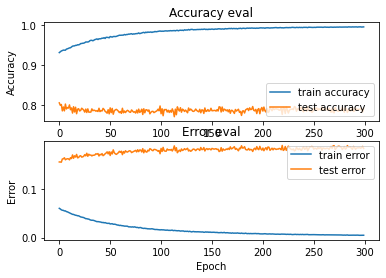

In [ ]:
import tensorflow.keras as keras
import matplotlib.pyplot as plt

def plot_history(history):
    """Plots accuracy/loss for training/validation set as a function of the epochs
        :param history: Training history of model
        :return:
    """

    fig, axs = plt.subplots(2)

    # create accuracy sublpot
    axs[0].plot(history.history["binary_accuracy"], label="train accuracy")
    axs[0].plot(history.history["val_binary_accuracy"], label="test accuracy")
    axs[0].set_ylabel("Accuracy")
    axs[0].legend(loc="lower right")
    axs[0].set_title("Accuracy eval")

    # create error sublpot
    axs[1].plot(history.history["loss"], label="train error")
    axs[1].plot(history.history["val_loss"], label="test error")
    axs[1].set_ylabel("Error")
    axs[1].set_xlabel("Epoch")
    axs[1].legend(loc="upper right")
    axs[1].set_title("Error eval")

    plt.show()

plot_history(history)


In [ ]:
predicted = model.predict([np.array([X_test[10]])])

def fun(x):
  return round(x)

print(np.round(predicted, 0))
print(y_test[10])

[[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
  0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
  0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
  0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
  0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
  0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
  0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
  0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
  0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
  0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
  0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
  0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0.
  0. 0. 0. 0. 0. 1. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
  1. 1. 1. 0. 0. 0. 1. 1. 1. 1. 1. 1. 